In [12]:
# Import libs
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model



In [13]:
# Preprocessing data
train_datagen = ImageDataGenerator(
    rescale=1.0/255
)

train_generator = train_datagen.flow_from_directory(
    'dataset/train',  # 학습 데이터 경로
    target_size=(224, 224),
    batch_size=32,
    shuffle=True,
    class_mode='categorical'
)

validation_generator = train_datagen.flow_from_directory(
    'dataset/test',  # 검증 데이터 경로
    target_size=(224, 224),
    batch_size=32,
    shuffle=True,
    class_mode='categorical'
)

Found 2500 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [14]:
# 사전 학습된 모델 불러오기
# b_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
b_model = VGG16(weights=None, include_top=False, input_shape=(224, 224, 3))

for layer in b_model.layers:
    layer.trainable = True

x = b_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)


model = Model(inputs=b_model.input, outputs=predictions)
model.summary()
# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1024)           │    25,691,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 5)              │         5,125 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,410,949 (154.16 MB)

 Trainable params: 40,410,949 (154.16 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:

# 모델 학습
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

Epoch 1/10


c:\Users\Kyounghwan-Kim\anaconda3\envs\ai-sejong-lec\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


78/78 ━━━━━━━━━━━━━━━━━━━━ 659s 8s/step - accuracy: 0.1946 - loss: 1.6646 - val_accuracy: 0.1937 - val_loss: 1.6095
Epoch 2/10
 1/78 ━━━━━━━━━━━━━━━━━━━━ 10:32 8s/step - accuracy: 0.2812 - loss: 1.6109

c:\Users\Kyounghwan-Kim\anaconda3\envs\ai-sejong-lec\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


78/78 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.2812 - loss: 1.6109 - val_accuracy: 0.3500 - val_loss: 1.6079
Epoch 3/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 641s 8s/step - accuracy: 0.2007 - loss: 1.6207 - val_accuracy: 0.2000 - val_loss: 1.6096
Epoch 4/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.1250 - loss: 1.6188 - val_accuracy: 0.2000 - val_loss: 1.6135
Epoch 5/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 632s 8s/step - accuracy: 0.2197 - loss: 1.6097 - val_accuracy: 0.2000 - val_loss: 1.6095
Epoch 6/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.0938 - loss: 1.6116 - val_accuracy: 0.2000 - val_loss: 1.6099
Epoch 7/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 629s 8s/step - accuracy: 0.2044 - loss: 1.6095 - val_accuracy: 0.1979 - val_loss: 1.6095
Epoch 8/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.1250 - loss: 1.6102 - val_accuracy: 0.2500 - val_loss: 1.6094
Epoch 9/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 622s 8s/step - accuracy: 0.1939 - loss: 1.6095 - val_accuracy: 0.1958 - val_loss: 1.

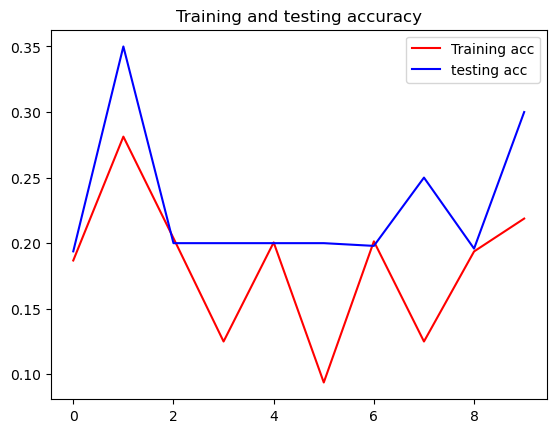

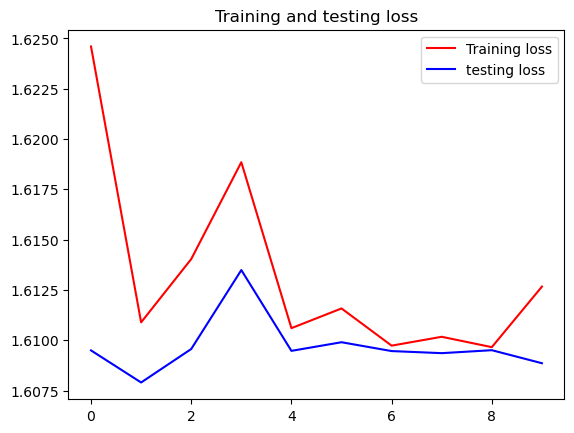

In [16]:
# Show Result
# 최종 결과 리포트
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

from matplotlib import pyplot as plt

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='testing acc')
plt.title('Training and testing accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='testing loss')
plt.title('Training and testing loss')
plt.legend()

plt.show()

In [17]:
from tensorflow.keras.applications import ResNet50

# ResNet
resnet_model = ResNet50(weights=None, include_top=False, input_shape=(224, 224, 3))

# 기존 모델의 가중치를 학습하지 않도록 고정
for layer in resnet_model.layers:
    layer.trainable = True

# 새로운 모델 생성
x = resnet_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

custom_resnet_model = Model(inputs=resnet_model.input, outputs=predictions)
custom_resnet_model.summary()
# 모델 컴파일
custom_resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_7[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 126,354,309 (482.00 MB)

 Trainable params: 126,301,189 (481.80 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [18]:
# 모델 학습
res_history = custom_resnet_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

Epoch 1/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 355s 4s/step - accuracy: 0.2429 - loss: 60.1641 - val_accuracy: 0.1458 - val_loss: 725.3212
Epoch 2/10
 1/78 ━━━━━━━━━━━━━━━━━━━━ 5:10 4s/step - accuracy: 0.3125 - loss: 1.5020

c:\Users\Kyounghwan-Kim\anaconda3\envs\ai-sejong-lec\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.3125 - loss: 1.5020 - val_accuracy: 0.2000 - val_loss: 592.6459
Epoch 3/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 329s 4s/step - accuracy: 0.4330 - loss: 3.7898 - val_accuracy: 0.1604 - val_loss: 1.9986
Epoch 4/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5312 - loss: 6.4834 - val_accuracy: 0.0500 - val_loss: 2.0179
Epoch 5/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 327s 4s/step - accuracy: 0.4399 - loss: 2.6487 - val_accuracy: 0.2042 - val_loss: 8.9898
Epoch 6/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5625 - loss: 1.1443 - val_accuracy: 0.1000 - val_loss: 7.4777
Epoch 7/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 328s 4s/step - accuracy: 0.5869 - loss: 1.6145 - val_accuracy: 0.2625 - val_loss: 1.9197
Epoch 8/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5000 - loss: 2.5706 - val_accuracy: 0.1000 - val_loss: 2.3207
Epoch 9/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 331s 4s/step - accuracy: 0.6507 - loss: 1.7256 - val_accuracy: 0.3187 - val_loss: 109.

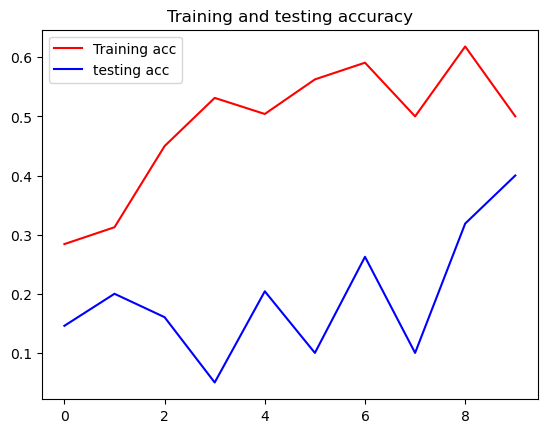

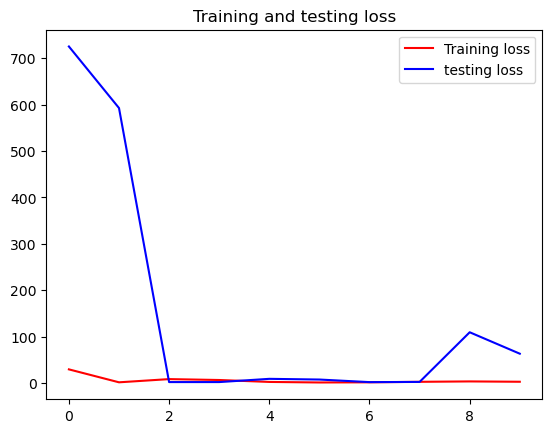

In [19]:
# Show Result
# 최종 결과 리포트
acc = res_history.history['accuracy']
val_acc = res_history.history['val_accuracy']
loss = res_history.history['loss']
val_loss = res_history.history['val_loss']
epochs = range(len(acc))

from matplotlib import pyplot as plt

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='testing acc')
plt.title('Training and testing accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='testing loss')
plt.title('Training and testing loss')
plt.legend()

plt.show()